In [19]:
import pandas as pd                 # data processing, CSV file
import numpy as np                  # linear algebra
import matplotlib.image as mpimg
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

# for showing plot graph
import matplotlib.pyplot as plt
# %matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Conv2D , MaxPool2D

In [20]:
# load data
train = pd.read_csv("C:/Users/skyba/PycharmProjects/DigitRecPracF/input/train.csv")
test = pd.read_csv("C:/Users/skyba/PycharmProjects/DigitRecPracF/input/test.csv")

In [21]:
# finding the basic information in train and test
# the image size is 784, 28x28
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [22]:
# get label column information in train
y_train = train["label"]
# Drop 'label' column
x_train = train.drop(labels = ["label"],axis = 1)

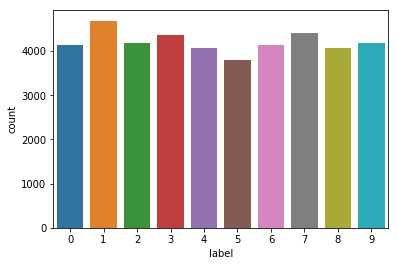

In [23]:
# try to show plot graph of y_train
g = sns.countplot(y_train)

In [24]:
# counts numbers of same labels in each label, there are 0~9 kinds label
print(y_train.value_counts())

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


In [25]:
# Check the data whether contain null information
nullX = x_train.isnull().any().describe()
nullT = test.isnull().any().describe()
print(nullX,"\n","\n",nullT)

count       784
unique        1
top       False
freq        784
dtype: object 
 
 count       784
unique        1
top       False
freq        784
dtype: object


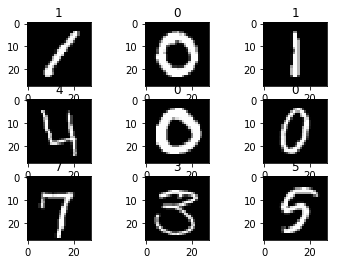

In [26]:
#Convert train datset to (num_images, img_rows, img_cols) format and show the image of 0~9 data
x_train = x_train.values.reshape(-1, 28, 28)
for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [27]:
#expand 1 more dimention as 1 for colour channel gray
x_train = x_train.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [28]:
# showing the new information
x_train.shape


(42000, 28, 28, 1)

In [29]:
# showing the new information
test.shape

(28000, 28, 28, 1)

In [30]:
# shows how many kinds of digits the data has 
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

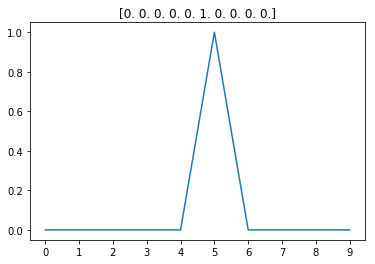

In [31]:
# showing which number of the label is, target is the index 8
plt.title(y_train[8])
plt.plot(y_train[8])
plt.xticks(range(10));

In [32]:
# set the random seed to 2
seed = 2
np.random.seed(seed)


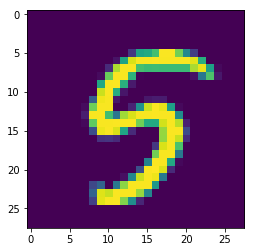

In [33]:
# Some examples of plt.imshow
g = plt.imshow(x_train[8][:,:,0])

In [34]:
# model with sequential cluster layer, for multiple actions in multiple layers
model = Sequential()

# adding the Convolutional Layers with Conv2D(for CNN), sub-matrix for searching will be size (5,5)(only in odd number), 
# padding the input and the ouput image as "same" dimension,
# relu for finding max value for comparing suitable target as result,
# MaxPool2D for reduce the spatial dimensions of the output volume
# stting time out in 0.25, avoiding overfitting
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


# second time for convolution for second learning in deeper layer(more deep[128, 256, 512, ....])
# changing strides defult(1,1) to (2,2) to reduce the size of the output volume
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.25))


# Flatten function to change the output into 1D array information
# Dense for 
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [46]:
from keras.callbacks import ReduceLROnPlateau

# Define the optimizer, setting the learning rate to 0.001,
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

epochs = 10 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [47]:
gen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


gen.fit(x_train)

In [48]:
from sklearn.model_selection import train_test_split
x = x_train
y = y_train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(x_train, y_train, batch_size=64)
val_batches=gen.flow(x_val, y_val, batch_size=64)

In [49]:

# Fit the model
history = model.fit_generator(gen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])


Epoch 1/10
 - 74s - loss: 0.2055 - acc: 0.9440 - val_loss: 0.0781 - val_acc: 0.9801
Epoch 2/10
 - 74s - loss: 0.1478 - acc: 0.9579 - val_loss: 0.0713 - val_acc: 0.9804
Epoch 3/10
 - 86s - loss: 0.1310 - acc: 0.9624 - val_loss: 0.0612 - val_acc: 0.9840
Epoch 4/10
 - 73s - loss: 0.1244 - acc: 0.9652 - val_loss: 0.0520 - val_acc: 0.9843
Epoch 5/10
 - 71s - loss: 0.1235 - acc: 0.9667 - val_loss: 0.0576 - val_acc: 0.9833
Epoch 6/10
 - 65s - loss: 0.1192 - acc: 0.9680 - val_loss: 0.0616 - val_acc: 0.9840
Epoch 7/10
 - 69s - loss: 0.1150 - acc: 0.9677 - val_loss: 0.0452 - val_acc: 0.9853
Epoch 8/10
 - 67s - loss: 0.1158 - acc: 0.9697 - val_loss: 0.0496 - val_acc: 0.9860
Epoch 9/10
 - 67s - loss: 0.1129 - acc: 0.9715 - val_loss: 0.0651 - val_acc: 0.9811
Epoch 10/10
 - 63s - loss: 0.1181 - acc: 0.9704 - val_loss: 0.0469 - val_acc: 0.9879


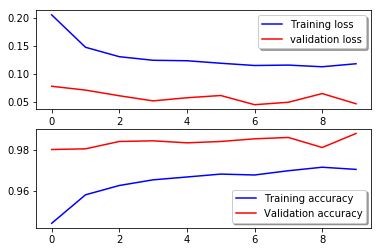

In [50]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)